In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [55]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [2,3,4]].values

In [56]:
dataset.sample(3)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
18,19,Male,52,23,29
164,165,Male,50,85,26
50,51,Female,49,42,52


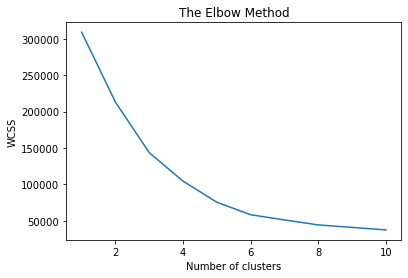

In [57]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [58]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

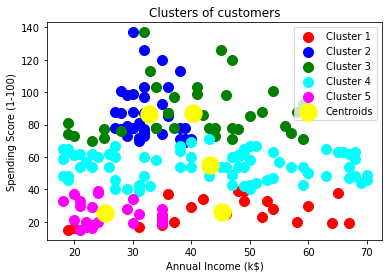

In [59]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [60]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [61]:
dataset.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [62]:
col = ['Age', 'Annual Income (k$)','Spending Score (1-100)']

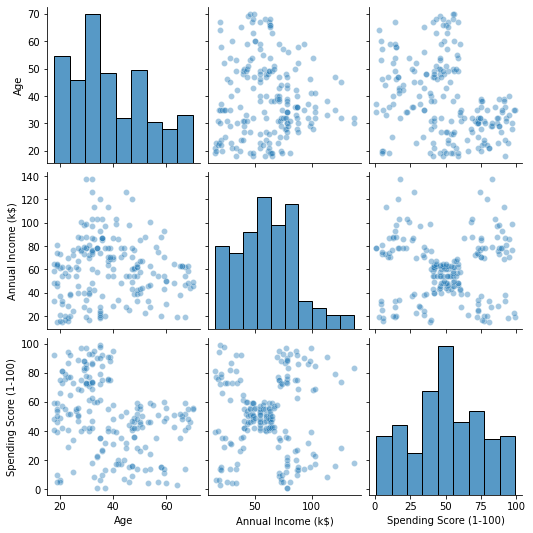

In [63]:
import seaborn as sns
sns.pairplot(dataset, vars=col, 
             plot_kws={'alpha': .4});

In [64]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler() # create StandardScaler instance
z=scaler.fit_transform(dataset[col]) # calc z-score
z[:5].round(4) # 2D numpy array

array([[-1.4246, -1.739 , -0.4348],
       [-1.281 , -1.739 ,  1.1957],
       [-1.3528, -1.7008, -1.7159],
       [-1.1375, -1.7008,  1.0404],
       [-0.5634, -1.6627, -0.396 ]])

In [65]:
z_cols = [f'z_{c}' for c in col]
z_cols

['z_Age', 'z_Annual Income (k$)', 'z_Spending Score (1-100)']

In [66]:
ds=pd.concat([dataset, pd.DataFrame(z, columns=z_cols)], axis='columns')
ds.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),z_Age,z_Annual Income (k$),z_Spending Score (1-100)
0,1,Male,19,15,39,-1.424569,-1.738999,-0.434801
1,2,Male,21,15,81,-1.281035,-1.738999,1.195704
2,3,Female,20,16,6,-1.352802,-1.700830,-1.715913
3,4,Female,23,16,77,-1.137502,-1.700830,1.040418
4,5,Female,31,17,40,-0.563369,-1.662660,-0.395980


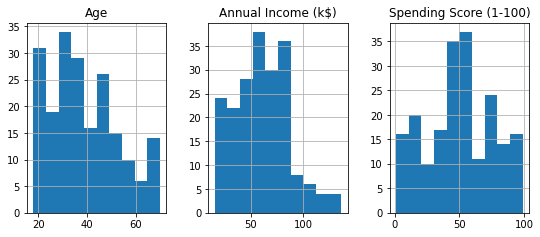

In [67]:
ds[col].hist(layout=(1, len(col)), figsize=(3*len(col), 3.5));

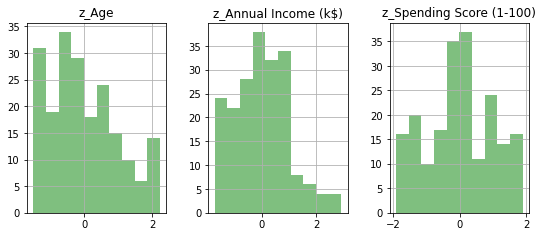

In [68]:
ds[z_cols].hist(layout=(1, len(z_cols)), figsize=(3*len(z_cols), 3.5), color='green', alpha=.5);

In [69]:
X=pd.DataFrame(z, columns=z_cols) ## power transformation (preferable)
# X=pd.DataFrame(z, columns=cols) ## z-score
X.head()

,z_Age,z_Annual Income (k$),z_Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


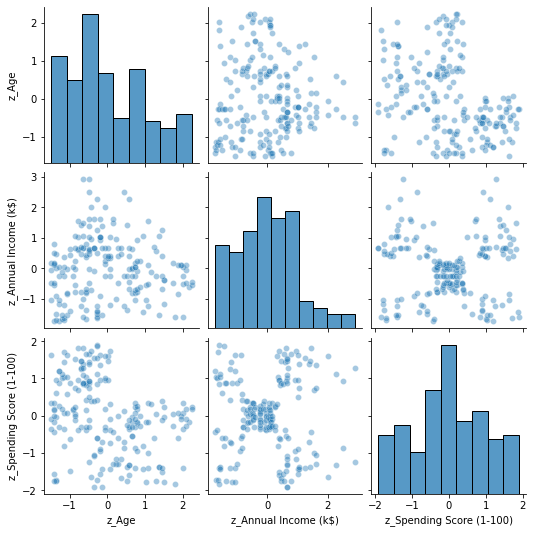

In [70]:
sns.pairplot(X, plot_kws={'alpha': .4});

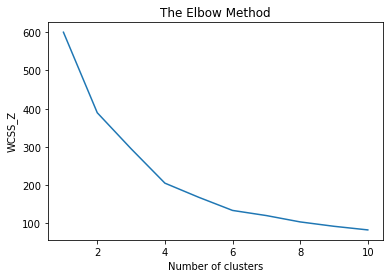

In [72]:
wcss_z = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss_z.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss_z)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS_Z')
plt.show()

In [73]:
kmeans_z = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [74]:
z_kmeans = kmeans_z.fit_predict(X)

In [75]:
kmeans_z.cluster_centers_.round(4)

array([[ 0.0372,  0.9901, -1.1888],
       [-0.4288,  0.9748,  1.2161],
       [-0.9625, -0.7848,  0.392 ],
       [ 1.0862, -0.4906, -0.3972]])

In [78]:
kmeans_z.labels_ # Label of 4 clasters: 0, 1, 2,3

array([2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 2, 2, 3, 2, 2, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2,
       3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2,
       2, 3, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 2, 0, 2, 2, 2, 3, 3, 3, 3, 2, 0, 1, 1, 0, 1, 0, 1, 3, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [79]:
#add claster label to dataframe to clasify data
dataset['cluster']=kmeans_z.labels_
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


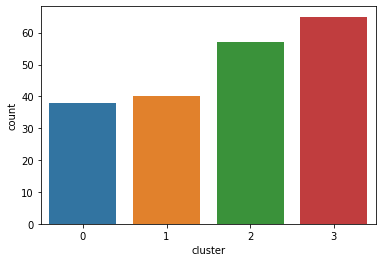

In [80]:
sns.countplot(x='cluster', data=dataset);

In [81]:
dataset.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'cluster'],
      dtype='object')

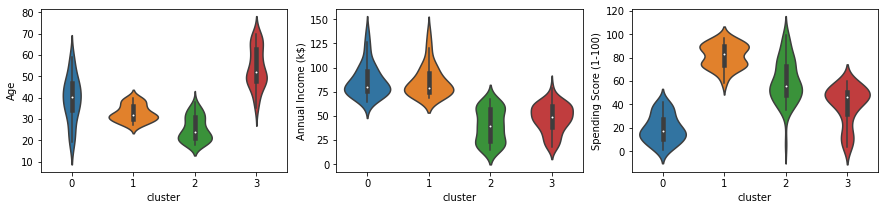

In [82]:
#ສັງເກດຄວາມແຕກຕ່າງຂອງແຕ່ລະກຸ່ມ ເຊັ່ນ Outliner of claset 1 in Total Fat 
cols=['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 3))
ax=ax.ravel()
for i, col in enumerate(cols):
    sns.violinplot(x='cluster', y=col, data=dataset, ax=ax[i])

In [44]:
#data transformed/scale updated
dx=X
dx['cluster']=kmeans_z.labels_
dx.head()

,z_Age,z_Annual Income (k$),z_Spending Score (1-100),cluster
0,-1.424569,-1.738999,-0.434801,2
1,-1.281035,-1.738999,1.195704,2
2,-1.352802,-1.700830,-1.715913,2
3,-1.137502,-1.700830,1.040418,2
4,-0.563369,-1.662660,-0.395980,2


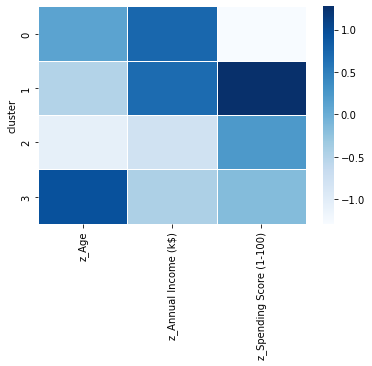

In [45]:
sns.heatmap(dx.groupby('cluster').median(), cmap="Blues", linewidths=1);

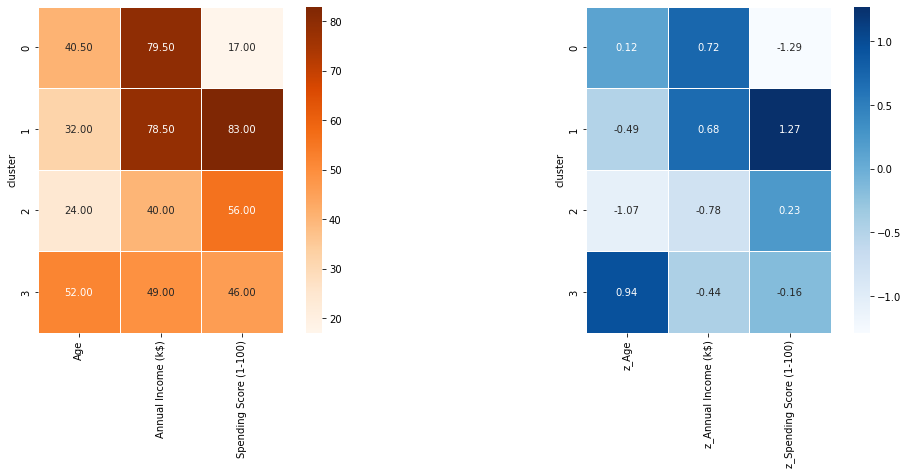

In [46]:
cols=['Age', 'Annual Income (k$)','Spending Score (1-100)', 'cluster']
z_cols=['z_Age', 'z_Annual Income (k$)','z_Spending Score (1-100)', 'cluster']
fig, ax = plt.subplots(ncols=2, figsize=(18, 6))
ax=ax.ravel()
sns.heatmap(dataset[cols].groupby('cluster').median(), cmap="Oranges", linewidths=1, 
            square=True, annot=True, fmt='.2f',ax=ax[0]);
sns.heatmap(dx[z_cols].groupby('cluster').median(), cmap="Blues", linewidths=1, 
            square=True, annot=True, fmt='.2f', ax=ax[1]);